# Template Notebook
This demos some code to facilitate running notebooks in VS Code, JupyterLab, or Colab.

#### Some LaTeX macros (hidden in math mode) that will not render correctly in VS Code
$
\newcommand{\vh}{\boldsymbol{h}}
\newcommand{\vt}{\boldsymbol{t}}
\newcommand{\vx}{\boldsymbol{x}}
\newcommand{\vX}{\boldsymbol{X}}
\newcommand{\cf}{\mathcal{F}}
\newcommand{\cu}{\mathcal{U}}
\newcommand{\dif}{\mathrm{d}}
\newcommand{\Ex}{\mathbb{E}}
\DeclareMathOperator{\disc}{disc}
\newcommand{\norm}[2][{}]{{\left \lVert #2 \right \rVert}_{#1}}
%refresh this from latex_macros.py when needed, may be edited ad hoc
$

#### Run the next two cells for set up.

In [1]:
# --- Unified bootstrap cell for local + Colab ---
import os, pathlib, subprocess, sys, importlib

# --- Required metadata for the header ---
os.environ["BOOT_ORG"]    = "QMCSoftware"       # GitHub org
os.environ["BOOT_REPO"]   = "QMCSoftware"   # This repo name
os.environ["NB_PATH"]     = "notebooks/TestingDemos/TemplateNotebook.ipynb"
os.environ["BOOT_BRANCH"] = "bootstrap_colab"              # Target branch
os.environ["QMCPY_BRANCH"] = "develop"           # QMCPy branch
os.environ["NOTEBOOK_HEADER_AUTORUN"] = "0"     # Avoid double badge
os.environ["AUTO_PLOT_PREFS"] = "1"             # Apply plotting preferences
# Optional: turn on verbose auto_imports logging
# os.environ["AUTO_IMPORTS_VERBOSE"] = "1"

# --- Colab: clone repo if missing (rare edge-case) ---
if "COLAB_RELEASE_TAG" in os.environ or "COLAB_GPU" in os.environ:
    repo_dir = pathlib.Path(f"/content/{os.environ['BOOT_REPO']}")
    if not repo_dir.exists():
        subprocess.check_call([
            "git","clone","--depth","1","--recurse-submodules",
            "-b", os.environ["BOOT_BRANCH"],
            f"https://github.com/{os.environ['BOOT_ORG']}/{os.environ['BOOT_REPO']}.git",
            str(repo_dir)
        ])
    sys.path.insert(0, str(repo_dir / "utils"))
    try:
        os.chdir(repo_dir)
    except Exception:
        pass
else:
    # Local: add utils to path
    try:
        repo_root = subprocess.check_output(["git","rev-parse","--show-toplevel"], text=True).strip()
        sys.path.insert(0, repo_root + "/utils")
    except Exception:
        pass

# --- Load / reload notebook header ---
import notebook_header
importlib.reload(notebook_header)
notebook_header.main()

Here is a markdown test of the macros: $\vx$

In [2]:
# ---- Sanity check: qmcpy ----
n = 2**10
x = qp.Sobol(3).gen_samples(n)
print("Generated", n, "samples in 3D Sobol sequence:")
print(x[:5])  # Print first 5 samples for brevity
variance = np.var(x, axis=0)
print("Variance of all samples:", variance)

Generated 1024 samples in 3D Sobol sequence:
[[0.79616209 0.08772333 0.71603828]
 [0.05834772 0.96641047 0.04054826]
 [0.74254841 0.58744353 0.34079854]
 [0.48109448 0.46656936 0.9143298 ]
 [0.98015681 0.80290721 0.87212975]]
Variance of all samples: [0.08333333 0.08333333 0.08333333]


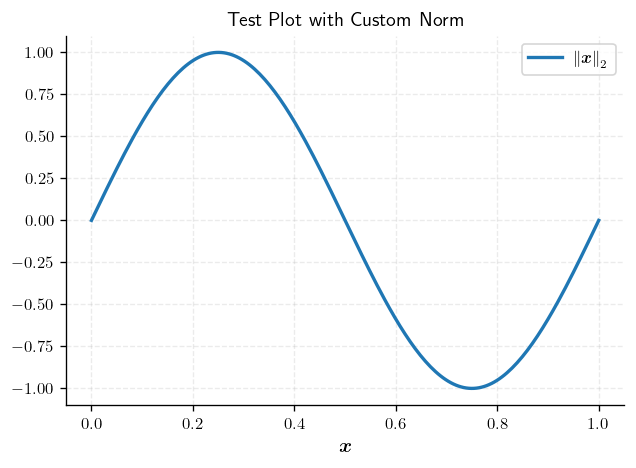

In [3]:
# ---- Sanity check: matplotlib preferences ----

x = np.linspace(0, 1, 200)
y = np.sin(2*np.pi*x)
plt.plot(x, y, label=r"$\norm{2}{\vx}$")
plt.title("Test Plot with Custom Norm")
plt.xlabel(r"$\vx$")
plt.legend(); plt.show()